In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np, pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import math
seoul = pd.read_csv("seoul_air_20130301-20170228.csv")
seoul


,MSRDT,MSRSTE_NM,NO2,O3,CO,SO2,PM10,PM25
0,201303012300,영등포구,0.021,0.030,0.7,0.005,45.0,20.0
1,201303012300,성북구,0.014,0.034,0.3,0.004,38.0,15.0
2,201303012300,동대문구,0.016,0.033,0.4,0.006,38.0,18.0
3,201303012300,구로구,0.021,0.027,0.4,0.005,43.0,21.0
4,201303012300,강서구,0.018,0.035,0.3,0.006,43.0,17.0
...,...,...,...,...,...,...,...,...
872896,201702280000,종로구,0.063,0.002,0.7,0.004,29.0,18.0
872897,201702280000,강동구,0.064,0.002,0.7,0.005,37.0,23.0
872898,201702280000,중구,0.060,0.003,0.4,0.004,22.0,14.0
872899,201702280000,강남구,0.053,0.006,0.4,0.006,34.0,21.0


In [26]:
#서울 데이터 onehotencoding for MSRSTE_NM
ohe = OneHotEncoder()
Nm_oh = ohe.fit_transform(seoul["MSRSTE_NM"].values.reshape(-1,1)).toarray()
seoul_oh = seoul.copy()
Nm_oh = pd.DataFrame(Nm_oh,columns=ohe.categories_[0])
Nm_oh
seoul_oh.drop(columns="MSRSTE_NM",inplace=True)
seoul_oh = pd.concat([seoul_oh,Nm_oh],axis=1)
date_s=seoul_oh["MSRDT"].astype(str)
seoul_oh["season"]=date_s.str[4:6]

change_value_dict={'01':'winter','02':'winter','03':'spring','04':'spring','05':'spring','06':'summer','07':'summer','08':'summer','09':'autumn','10':'autumn','11':'winter','12':'winter'}

seoul_oh=seoul_oh.replace({'season':change_value_dict})
seoul["season"]=date_s.str[4:6]

seoul=seoul.replace({'season':change_value_dict})



,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
872897,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
872898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
872899,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
std_seoul = pd.DataFrame(StandardScaler().fit_transform(seoul_oh.iloc[:,1:7]),columns=seoul_oh.iloc[:,1:7].columns)
mm_seoul = pd.DataFrame(MinMaxScaler().fit_transform(seoul_oh.iloc[:,1:7]),columns=seoul_oh.iloc[:,1:7].columns)
ma_seoul = pd.DataFrame(MaxAbsScaler().fit_transform(seoul_oh.iloc[:,1:7]),columns=seoul_oh.iloc[:,1:7].columns)
rb_seoul = pd.DataFrame(RobustScaler().fit_transform(seoul_oh.iloc[:,1:7]),columns=seoul_oh.iloc[:,1:7].columns)



In [28]:
col = seoul_oh.iloc[:,1:7].columns.append(seoul_oh.drop(columns=std_seoul.columns).columns)

std_seoul = pd.concat([std_seoul,seoul_oh.drop(columns=std_seoul.columns)],axis=1,ignore_index = True)
mm_seoul = pd.concat([mm_seoul,seoul_oh.drop(columns=mm_seoul.columns)],axis=1,ignore_index = True)
ma_seoul = pd.concat([ma_seoul,seoul_oh.drop(columns=ma_seoul.columns)],axis=1,ignore_index = True)
rb_seoul = pd.concat([rb_seoul,seoul_oh.drop(columns=rb_seoul.columns)],axis=1,ignore_index = True)
std_seoul.columns=col
mm_seoul.columns=col
ma_seoul.columns=col
rb_seoul.columns=col

std_seoul

,NO2,O3,CO,SO2,PM10,PM25,MSRDT,강남구,강동구,강북구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,season
0,-0.609132,0.401441,0.705679,-0.075234,0.007840,-0.140831,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,spring
1,-1.011489,0.613121,-0.771591,-0.506737,-0.193438,-0.320985,201303012300,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
2,-0.896530,0.560201,-0.402274,0.356270,-0.193438,-0.212893,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
3,-0.609132,0.242681,-0.402274,-0.075234,-0.049668,-0.104800,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
4,-0.781571,0.666041,-0.771591,0.356270,-0.049668,-0.248923,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872896,1.805011,-1.080317,0.705679,-0.506737,-0.452224,-0.212893,201702280000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,winter
872897,1.862490,-1.080317,0.705679,-0.075234,-0.222192,-0.032739,201702280000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,winter
872898,1.632572,-1.027397,-0.402274,-0.506737,-0.653502,-0.357015,201702280000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,winter
872899,1.230215,-0.868637,-0.402274,0.356270,-0.308454,-0.104800,201702280000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,winter


In [29]:
std_kmeans=KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
std_encoded=std_seoul[['NO2','O3','CO','SO2','PM10','PM25']]
std_kmeans.fit(std_encoded)

mm_kmeans=KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
mm_encoded=mm_seoul[['NO2','O3','CO','SO2','PM10','PM25']]
mm_kmeans.fit(mm_encoded)


ma_kmeans=KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
ma_encoded=ma_seoul[['NO2','O3','CO','SO2','PM10','PM25']]
ma_kmeans.fit(ma_encoded)


rb_kmeans=KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
rb_encoded=rb_seoul[['NO2','O3','CO','SO2','PM10','PM25']]
rb_kmeans.fit(rb_encoded)


KMeans(init='random', n_clusters=2, random_state=42)

KMeans(init='random', n_clusters=2, random_state=42)

KMeans(init='random', n_clusters=2, random_state=42)

KMeans(init='random', n_clusters=4, random_state=42)

In [30]:
std_predict= pd.DataFrame(std_kmeans.predict(std_encoded),columns=['cluster'])
std_encoded=pd.concat([std_encoded,std_predict],axis=1)
std_kmeans.labels_=std_kmeans.labels_+1

mm_predict= pd.DataFrame(mm_kmeans.predict(mm_encoded),columns=['cluster'])
mm_encoded=pd.concat([mm_encoded,mm_predict],axis=1)
mm_kmeans.labels_=mm_kmeans.labels_+1

ma_predict= pd.DataFrame(ma_kmeans.predict(ma_encoded),columns=['cluster'])
ma_encoded=pd.concat([ma_encoded,ma_predict],axis=1)
ma_kmeans.labels_=ma_kmeans.labels_+1

rb_predict= pd.DataFrame(rb_kmeans.predict(rb_encoded),columns=['cluster'])
rb_encoded=pd.concat([rb_encoded,rb_predict],axis=1)
rb_kmeans.labels_=rb_kmeans.labels_+1


In [31]:
for i in range(7,32):
    index_tmp = std_seoul.index[std_seoul[col[i]] == 1]
    #print(np.unique(kmeans.labels_[index_tmp].tolist()))
    std_seoul.iloc[index_tmp, i] = std_kmeans.labels_[index_tmp].tolist()
    
for i in range(7,32):
    index_tmp = mm_seoul.index[mm_seoul[col[i]] == 1]
    #print(np.unique(kmeans.labels_[index_tmp].tolist()))
    mm_seoul.iloc[index_tmp, i] = mm_kmeans.labels_[index_tmp].tolist()

for i in range(7,32):
    index_tmp = ma_seoul.index[ma_seoul[col[i]] == 1]
    #print(np.unique(kmeans.labels_[index_tmp].tolist()))
    ma_seoul.iloc[index_tmp, i] = ma_kmeans.labels_[index_tmp].tolist()
    
for i in range(7,32):
    index_tmp = rb_seoul.index[rb_seoul[col[i]] == 1]
    #print(np.unique(kmeans.labels_[index_tmp].tolist()))
    rb_seoul.iloc[index_tmp, i] = rb_kmeans.labels_[index_tmp].tolist()

In [32]:

sum_stb=np.zeros(25,dtype=object)
for i in range(7,32):
    index_tmp = std_seoul.index[std_seoul[col[i]]!=0]
    sum_stb[i-7] = sum_stb[i-7]+std_seoul.iloc[index_tmp, i]

sum_mm=np.zeros(25,dtype=object)
for i in range(7,32):
    index_tmp = mm_seoul.index[mm_seoul[col[i]]!=0]
    sum_mm[i-7] = sum_mm[i-7]+mm_seoul.iloc[index_tmp, i]

sum_ma=np.zeros(25,dtype=object)
for i in range(7,32):
    index_tmp = ma_seoul.index[ma_seoul[col[i]]!=0]
    sum_ma[i-7] = sum_ma[i-7]+ma_seoul.iloc[index_tmp, i]

sum_rb=np.zeros(25,dtype=object)
for i in range(7,32):
    index_tmp = rb_seoul.index[rb_seoul[col[i]]!=0]
    sum_rb[i-7] = sum_rb[i-7]+rb_seoul.iloc[index_tmp, i]

#for i in range(25):
#    print(sum1[i].sum()/sum1[i].size)
#print(sum1[1].name)

In [33]:
def cal(temparray):
    for i in range(len(temparray)):
        for j in range(len(temparray)-i-1):
            if temparray[j]>temparray[j+1]:
                temp=temparray[j]
                temparray[j]=temparray[j+1]
                temparray[j+1]=temp
    return temparray

In [34]:
def compare(tmp1,tmp2):
    resultarray=np.zeros(len(tmp1))
    for i in range(len(tmp1)):
        for j in range(len(tmp1)):
            if tmp1[i]==tmp2[j]:
                resultarray[i]=j
                continue
    return resultarray    
            
        

In [35]:
def setting(tmp):
    sizenum=round(len(tmp)/4)
    for i in range(len(tmp)):
        if tmp[i]<sizenum:
            tmp[i]=0
        elif tmp[i]<sizenum*2:
            tmp[i]=1
        elif tmp[i]<sizenum*3:
            tmp[i]=2
        else:
            tmp[i]=3
            
            

In [36]:
tmp_array_name=np.zeros(25,dtype=object)
tmp_array_size=np.zeros(25,dtype=object)
for i in range(0,25):
    tmp_array_name[i]=sum_stb[i].name
    tmp_array_size[i]=sum_stb[i].sum()/sum_stb[i].size
std_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


tmp2=tmp_array_size.copy()
cal(tmp2)

fnl_std=compare(tmp_array_size,tmp2)
setting(fnl_std)
std_seoul_df['cluster']=fnl_std
print(tmp_array_size)
std_seoul_df

tmp_array_name=np.zeros(25,dtype=object)
tmp_array_size=np.zeros(25,dtype=object)
for i in range(0,25):
    tmp_array_name[i]=sum_mm[i].name
    tmp_array_size[i]=sum_mm[i].sum()/sum_stb[i].size
mm_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


tmp2=tmp_array_size.copy()
cal(tmp2)
fnl_mm=compare(tmp_array_size,tmp2)
setting(fnl_mm)
mm_seoul_df['cluster']=fnl_mm
print(tmp_array_size)
mm_seoul_df

tmp_array_name=np.zeros(25,dtype=object)
tmp_array_size=np.zeros(25,dtype=object)
for i in range(0,25):
    tmp_array_name[i]=sum_ma[i].name
    tmp_array_size[i]=sum_ma[i].sum()/sum_ma[i].size
ma_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


tmp2=tmp_array_size.copy()
cal(tmp2)
fnl_ma=compare(tmp_array_size,tmp2)
setting(fnl_ma)
ma_seoul_df['cluster']=fnl_ma
print(tmp_array_size)
ma_seoul_df

tmp_array_name=np.zeros(25,dtype=object)
tmp_array_size=np.zeros(25,dtype=object)
for i in range(0,25):
    tmp_array_name[i]=sum_rb[i].name
    tmp_array_size[i]=sum_rb[i].sum()/sum_rb[i].size
rb_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)

tmp2=tmp_array_size.copy()
cal(tmp2)
fnl_rb=compare(tmp_array_size,tmp2)
setting(fnl_rb)
rb_seoul_df['cluster']=fnl_rb
print(tmp_array_size)
rb_seoul_df

array([1.610710108128156, 1.6224644090040228, 1.6394704613051845,
       1.6399714285714286, 1.64706050800378, 1.6494167429094235,
       1.6501021301429821, 1.6570157172604616, 1.6572807493503157,
       1.6615286734723387, 1.6630751643326664, 1.6633858267716535,
       1.6731268731268731, 1.6743163783752926, 1.6769745687559001,
       1.67767578851048, 1.6793326095651677, 1.6799520698410888,
       1.6801803086930474, 1.6895969794914334, 1.6918556553986592,
       1.6938769687286008, 1.718595548952947, 1.7237945791726106,
       1.73920116194626], dtype=object)

[1.6731268731268731 1.6633858267716535 1.73920116194626 1.6494167429094235
 1.610710108128156 1.6793326095651677 1.6572807493503157
 1.6394704613051845 1.6895969794914334 1.7237945791726106
 1.6224644090040228 1.6630751643326664 1.6615286734723387
 1.718595548952947 1.6743163783752926 1.6938769687286008
 1.6570157172604616 1.6799520698410888 1.6501021301429821 1.64706050800378
 1.6801803086930474 1.67767578851048 1.6918556553986592 1.6399714285714286
 1.6769745687559001]


,Mean value,cluster
강남구,1.67313,2.0
강동구,1.66339,1.0
강북구,1.7392,3.0
강서구,1.64942,0.0
관악구,1.61071,0.0
광진구,1.67933,2.0
구로구,1.65728,1.0
금천구,1.63947,0.0
노원구,1.6896,3.0
도봉구,1.72379,3.0


array([1.4724092672905729, 1.4795618564052828, 1.4878890759179482,
       1.4881889763779528, 1.4917142857142858, 1.5082593934552508,
       1.5095475952618809, 1.5114014113255962, 1.5141080140366894,
       1.5165045219822544, 1.5234272327295584, 1.523862533538848,
       1.5267221412027108, 1.5269894905644168, 1.5292675809746135,
       1.5451148195692483, 1.5452153040862953, 1.5481187099725526,
       1.548187773550362, 1.5485853100885967, 1.568409629608476,
       1.5758416521266554, 1.5790849673202614, 1.5984344199068652,
       1.6077888730385164], dtype=object)

[1.5095475952618809 1.4881889763779528 1.5790849673202614
 1.5481187099725526 1.5082593934552508 1.5234272327295584
 1.568409629608476 1.5114014113255962 1.5758416521266554
 1.6077888730385164 1.5165045219822544 1.5485853100885967
 1.5452153040862953 1.5984344199068652 1.523862533538848
 1.4724092672905729 1.4795618564052828 1.5141080140366894
 1.5292675809746135 1.5269894905644168 1.4878890759179482
 1.5267221412027108 1.5451148195692483 1.4917142857142858
 1.548187773550362]


,Mean value,cluster
강남구,1.50955,1.0
강동구,1.48819,0.0
강북구,1.57908,3.0
강서구,1.54812,2.0
관악구,1.50826,0.0
광진구,1.52343,1.0
구로구,1.56841,3.0
금천구,1.5114,1.0
노원구,1.57584,3.0
도봉구,1.60779,3.0


array([1.4740070760100434, 1.4807313803234732, 1.4889732104647513,
       1.4891874928677393, 1.4925714285714287, 1.5094291175715386,
       1.5107178535749963, 1.51274275383449, 1.514992439588029,
       1.5176171863855525, 1.5245128849780012, 1.525204087457898,
       1.5280661119213061, 1.528220841327568, 1.5304931426903998,
       1.5462273570104121, 1.5464299141097197, 1.5490908051235133,
       1.5494712775078594, 1.5497325285350574, 1.5696947197075706,
       1.5768427676553873, 1.580392156862745, 1.599605748078736,
       1.60867332382311], dtype=object)

[1.5107178535749963 1.4891874928677393 1.580392156862745
 1.5490908051235133 1.5094291175715386 1.5245128849780012
 1.5696947197075706 1.51274275383449 1.5768427676553873 1.60867332382311
 1.5176171863855525 1.5494712775078594 1.5464299141097197
 1.599605748078736 1.525204087457898 1.4740070760100434 1.4807313803234732
 1.514992439588029 1.5304931426903998 1.528220841327568 1.4889732104647513
 1.5280661119213061 1.5462273570104121 1.4925714285714287
 1.5497325285350574]


,Mean value,cluster
강남구,1.51072,1.0
강동구,1.48919,0.0
강북구,1.58039,3.0
강서구,1.54909,2.0
관악구,1.50943,0.0
광진구,1.52451,1.0
구로구,1.56969,3.0
금천구,1.51274,1.0
노원구,1.57684,3.0
도봉구,1.60867,3.0


array([2.8821716926763856, 2.908847108499044, 2.9146271729185727,
       2.9388231177465447, 2.947225633263843, 2.9528364021648863,
       2.971734781366105, 2.973446162824628, 3.007285714285714,
       3.008220351077494, 3.0108132848928686, 3.019289163943434,
       3.0287749206258403, 3.0472963312458896, 3.0473825426728323,
       3.067214424283921, 3.0694052203679933, 3.070326096259736,
       3.070713409590096, 3.075624250042855, 3.0804256654589026,
       3.136918687589158, 3.1507361333028987, 3.158843527697626,
       3.1799564270152505], dtype=object)

[3.008220351077494 3.067214424283921 3.1799564270152505 2.9146271729185727
 2.8821716926763856 3.075624250042855 2.947225633263843 2.9388231177465447
 3.0287749206258403 3.136918687589158 2.908847108499044 2.971734781366105
 3.019289163943434 3.158843527697626 3.0473825426728323 3.1507361333028987
 3.070713409590096 3.0804256654589026 2.973446162824628 2.9528364021648863
 3.070326096259736 3.0472963312458896 3.0694052203679933 3.007285714285714
 3.0108132848928686]


,Mean value,cluster
강남구,3.00822,1.0
강동구,3.06721,2.0
강북구,3.17996,3.0
강서구,2.91463,0.0
관악구,2.88217,0.0
광진구,3.07562,3.0
구로구,2.94723,0.0
금천구,2.93882,0.0
노원구,3.02877,2.0
도봉구,3.13692,3.0


In [37]:
rb_kmeans.labels_
mm_kmeans.labels_
ma_kmeans.labels_
std_kmeans.labels_


array([3, 4, 3, ..., 4, 2, 2])

array([2, 2, 2, ..., 1, 1, 1])

array([2, 2, 2, ..., 1, 1, 1])

array([2, 2, 2, ..., 1, 1, 1])

In [38]:
max=seoul_oh["SO2"].max()

seoul=seoul[seoul.PM10<50]

seoul
    
seoul['PM10'].max()

,MSRDT,MSRSTE_NM,NO2,O3,CO,SO2,PM10,PM25,season
0,201303012300,영등포구,0.021,0.030,0.7,0.005,45.0,20.0,spring
1,201303012300,성북구,0.014,0.034,0.3,0.004,38.0,15.0,spring
2,201303012300,동대문구,0.016,0.033,0.4,0.006,38.0,18.0,spring
3,201303012300,구로구,0.021,0.027,0.4,0.005,43.0,21.0,spring
4,201303012300,강서구,0.018,0.035,0.3,0.006,43.0,17.0,spring
...,...,...,...,...,...,...,...,...,...
872896,201702280000,종로구,0.063,0.002,0.7,0.004,29.0,18.0,winter
872897,201702280000,강동구,0.064,0.002,0.7,0.005,37.0,23.0,winter
872898,201702280000,중구,0.060,0.003,0.4,0.004,22.0,14.0,winter
872899,201702280000,강남구,0.053,0.006,0.4,0.006,34.0,21.0,winter


49.0

Text(0.5, 1.0, 'Scatter Plot')

Text(0.5, 0, 'PM10')

Text(0, 0.5, 'O3')

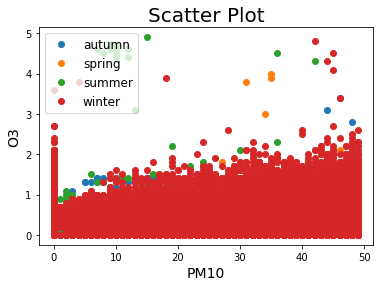

In [39]:
groups=seoul.groupby('season')

fig,  ax=plt.subplots()

for name,group in  groups:
    ax.plot(group.PM10,group.CO,marker='o',linestyle='',label=name)
    
ax.legend(fontsize=12, loc='upper left') # legend position

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('PM10', fontsize=14)

plt.ylabel('O3', fontsize=14)

plt.show()



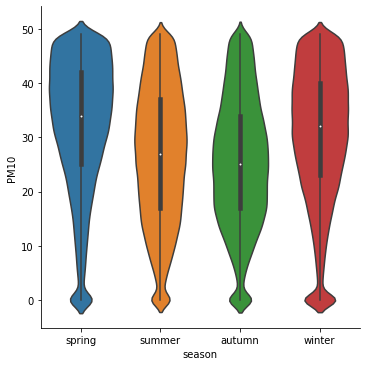

In [40]:
sns.catplot(data= seoul, x= 'season', y= 'PM10', kind= 'violin')

In [41]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins

In [42]:
state_geo = 'TL_SCCO_SIG_WGS84.json'
state_geo2 = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [43]:
json_data=open(state_geo).read()
jsonResult = json.loads(json_data)



def points_array(points):

    final_points = []

    for x in range(0, len(points)):

        if len(points[x]) == 2:
            final_points.append(points[x])
        else:
            target = points[x]
            for y in range(0, len(target)):
                final_points.append(target[y])

    return final_points

center_locations = pd.DataFrame()
codes = []
names = []
x_list = []
y_list = []
for x in range(0, len(jsonResult['features'])):
    code = jsonResult['features'][x]['properties']['SIG_CD']
    name = jsonResult['features'][x]['properties']['SIG_KOR_NM']
    # 중앙값 생성
    points = jsonResult['features'][x]['geometry']['coordinates'][0]
    points = points_array(points)
    points_df = pd.DataFrame(points)
    points_df.columns = ['x','y']
    x = points_df.x
    y = points_df.y
    X = (x[1]+x[2])/2
    Y = (y[1]+y[2])/2

    # 결과
    codes.append(code)
    names.append(name)
    x_list.append(X)
    y_list.append(Y)

# 데이터 프레임 생성
center_locations['CODE'] = codes
center_locations['NAME'] = names
center_locations['X'] = x_list
center_locations['Y'] = y_list


In [44]:
temp_seoulmap_std=pd.DataFrame({'NAME':tmp_array_name})
for i in range(0,25):
    tmp_array_name[i]=sum_stb[i].name
    tmp_array_size[i]=sum_stb[i].sum()/sum_stb[i].size
std_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


temp_seoulmap_std['VALUE']=fnl_std
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
target_df = pd.merge(temp_seoulmap_std,center_locations2, how = 'left', on = 'NAME')
target_df = target_df.dropna(axis=0, subset=['X','Y'])
                             
m=folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo2,
    name='미세먼지 위험군',
    data=temp_seoulmap_std,
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)

# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)

    if target_df.iloc[i]['NAME'] in ['서초구','강남구'] :
        color = 'white'
    else:
        color = '#3186cc'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=target_df.iloc[i]['NAME'] + "\n" + str(int(round(target_df.iloc[i]['VALUE']/10000,0))) + "만원").add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save('kr_incode.html')
# webbrowser.open_new("folium_kr.html")
m
                             
temp_seoulmap_mm=pd.DataFrame({'NAME':tmp_array_name})
for i in range(0,25):
    tmp_array_name[i]=sum_mm[i].name
    tmp_array_size[i]=sum_mm[i].sum()/sum_mm[i].size
mm_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


temp_seoulmap_mm['VALUE']=fnl_mm
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
target_df = pd.merge(temp_seoulmap_mm,center_locations2, how = 'left', on = 'NAME')
target_df = target_df.dropna(axis=0, subset=['X','Y'])
                             
m=folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo2,
    name='미세먼지 위험군',
    data=temp_seoulmap_mm,
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)

# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)

    if target_df.iloc[i]['NAME'] in ['서초구','강남구'] :
        color = 'white'
    else:
        color = '#3186cc'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=target_df.iloc[i]['NAME'] + "\n" + str(int(round(target_df.iloc[i]['VALUE']/10000,0))) + "만원").add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save('kr_incode.html')
# webbrowser.open_new("folium_kr.html")
m
                                                     
temp_seoulmap_ma=pd.DataFrame({'NAME':tmp_array_name})
for i in range(0,25):
    tmp_array_name[i]=sum_ma[i].name
    tmp_array_size[i]=sum_ma[i].sum()/sum_ma[i].size
ma_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


temp_seoulmap_ma['VALUE']=fnl_ma
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
target_df = pd.merge(temp_seoulmap_ma,center_locations2, how = 'left', on = 'NAME')
target_df = target_df.dropna(axis=0, subset=['X','Y'])
                             
m=folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo2,
    name='미세먼지 위험군',
    data=temp_seoulmap_ma,
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)

# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)

    if target_df.iloc[i]['NAME'] in ['서초구','강남구'] :
        color = 'white'
    else:
        color = '#3186cc'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=target_df.iloc[i]['NAME'] + "\n" + str(int(round(target_df.iloc[i]['VALUE']/10000,0))) + "만원").add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save('kr_incode.html')
# webbrowser.open_new("folium_kr.html")
m


temp_seoulmap_rb=pd.DataFrame({'NAME':tmp_array_name})
for i in range(0,25):
    tmp_array_name[i]=sum_rb[i].name
    tmp_array_size[i]=sum_rb[i].sum()/sum_rb[i].size
rb_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


temp_seoulmap_rb['VALUE']=fnl_rb
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
target_df = pd.merge(temp_seoulmap_rb,center_locations2, how = 'left', on = 'NAME')
target_df = target_df.dropna(axis=0, subset=['X','Y'])
                             
m=folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo2,
    name='미세먼지 위험군',
    data=temp_seoulmap_rb,
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)

# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)

    if target_df.iloc[i]['NAME'] in ['서초구','강남구'] :
        color = 'white'
    else:
        color = '#3186cc'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=target_df.iloc[i]['NAME'] + "\n" + str(int(round(target_df.iloc[i]['VALUE']/10000,0))) + "만원").add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save('kr_incode.html')
# webbrowser.open_new("folium_kr.html")
m
                             

C:\Users\parks\anaconda4\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


C:\Users\parks\anaconda4\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


C:\Users\parks\anaconda4\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


C:\Users\parks\anaconda4\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [45]:
std_seoul

,NO2,O3,CO,SO2,PM10,PM25,MSRDT,강남구,강동구,강북구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,season
0,-0.609132,0.401441,0.705679,-0.075234,0.007840,-0.140831,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,spring
1,-1.011489,0.613121,-0.771591,-0.506737,-0.193438,-0.320985,201303012300,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
2,-0.896530,0.560201,-0.402274,0.356270,-0.193438,-0.212893,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
3,-0.609132,0.242681,-0.402274,-0.075234,-0.049668,-0.104800,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
4,-0.781571,0.666041,-0.771591,0.356270,-0.049668,-0.248923,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872896,1.805011,-1.080317,0.705679,-0.506737,-0.452224,-0.212893,201702280000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,winter
872897,1.862490,-1.080317,0.705679,-0.075234,-0.222192,-0.032739,201702280000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,winter
872898,1.632572,-1.027397,-0.402274,-0.506737,-0.653502,-0.357015,201702280000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,winter
872899,1.230215,-0.868637,-0.402274,0.356270,-0.308454,-0.104800,201702280000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,winter


In [46]:
rb_seoul

,NO2,O3,CO,SO2,PM10,PM25,MSRDT,강남구,강동구,강북구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,season
0,-0.333333,0.423077,0.666667,0.0,0.21875,-0.055556,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,spring
1,-0.625000,0.576923,-0.666667,-0.5,0.00000,-0.333333,201303012300,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
2,-0.541667,0.538462,-0.333333,0.5,0.00000,-0.166667,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
3,-0.333333,0.307692,-0.333333,0.0,0.15625,0.000000,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
4,-0.458333,0.615385,-0.666667,0.5,0.15625,-0.222222,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872896,1.416667,-0.653846,0.666667,-0.5,-0.28125,-0.166667,201702280000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,winter
872897,1.458333,-0.653846,0.666667,0.0,-0.03125,0.111111,201702280000,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,winter
872898,1.291667,-0.615385,-0.333333,-0.5,-0.50000,-0.388889,201702280000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,winter
872899,1.000000,-0.500000,-0.333333,0.5,-0.12500,0.000000,201702280000,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,winter
